# ADS-502 Final Project: Chest Pain Classification

## EXPLORATORY DATA ANALYSIS

In [1]:
## PACKAGES - Alphabetized ##
import graphviz
from keras.models import Sequential
from keras.layers import Dense
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random 
from scipy import stats
import scipy.stats.distributions as dist
import seaborn as sns
from sklearn import metrics
from sklearn.compose import make_column_transformer
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import f_regression 
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import sklearn.tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import statsmodels.api as sm
import statsmodels.tools.tools as stattools
from tensorflow.keras.utils import to_categorical
import warnings

In [2]:
h_data = pd.read_csv('heart.csv')
#s_data= pd.read_csv('o2Saturation.csv')

## 1. Data Shape

In [3]:
h_data.shape

(303, 14)

There are 303 instances and 14 attributes.

In [4]:
# Rename Columns
h_data.columns = ["Age", "Sex", "Chest_Pain",
                 "Resting_Blood_Pressure",
                 "Cholesterol", "Fast_Blood_Sugar",
                 "Rest_ECG", "Max_Heart_Rate",
                 "Exercise_Angina", "Previous_Peak",
                 "Slope", "Number_Major_Vessels",
                 "Thal", "Heart_Attack"]

# Thal - Blood disorder Thalassemia
## 1 - Fixed Defect, 2 - Normal Blood Flow, 3 - Reversible defect

In [5]:
#s_data.shape

In the O2 Saturation CSV file, there are 3585 records and 1 attribute.

## 2. Data Type and Missing Value Investigation

In [6]:
h_data.info()
h_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     303 non-null    int64  
 1   Sex                     303 non-null    int64  
 2   Chest_Pain              303 non-null    int64  
 3   Resting_Blood_Pressure  303 non-null    int64  
 4   Cholesterol             303 non-null    int64  
 5   Fast_Blood_Sugar        303 non-null    int64  
 6   Rest_ECG                303 non-null    int64  
 7   Max_Heart_Rate          303 non-null    int64  
 8   Exercise_Angina         303 non-null    int64  
 9   Previous_Peak           303 non-null    float64
 10  Slope                   303 non-null    int64  
 11  Number_Major_Vessels    303 non-null    int64  
 12  Thal                    303 non-null    int64  
 13  Heart_Attack            303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.

Age                       0
Sex                       0
Chest_Pain                0
Resting_Blood_Pressure    0
Cholesterol               0
Fast_Blood_Sugar          0
Rest_ECG                  0
Max_Heart_Rate            0
Exercise_Angina           0
Previous_Peak             0
Slope                     0
Number_Major_Vessels      0
Thal                      0
Heart_Attack              0
dtype: int64

Every attribute is numerical, either as an integer or a float. There are no missing values.

In [7]:
#s_data.info()
#s_data.isnull().sum()

In the O2_Saturation data, there are no missing values.

In [8]:
h_data.describe()

,Age,Sex,Chest_Pain,Resting_Blood_Pressure,Cholesterol,Fast_Blood_Sugar,Rest_ECG,Max_Heart_Rate,Exercise_Angina,Previous_Peak,Slope,Number_Major_Vessels,Thal,Heart_Attack
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
print("Median Values")
for i in h_data.columns:
    x = np.median(h_data[i])
    print("The median value for %s is:" % i, x)

Median Values
The median value for Age is: 55.0
The median value for Sex is: 1.0
The median value for Chest_Pain is: 1.0
The median value for Resting_Blood_Pressure is: 130.0
The median value for Cholesterol is: 240.0
The median value for Fast_Blood_Sugar is: 0.0
The median value for Rest_ECG is: 1.0
The median value for Max_Heart_Rate is: 153.0
The median value for Exercise_Angina is: 0.0
The median value for Previous_Peak is: 0.8
The median value for Slope is: 1.0
The median value for Number_Major_Vessels is: 0.0
The median value for Thal is: 2.0
The median value for Heart_Attack is: 1.0


In [10]:
#s_data.describe()

## 3. Distribution of Attributes

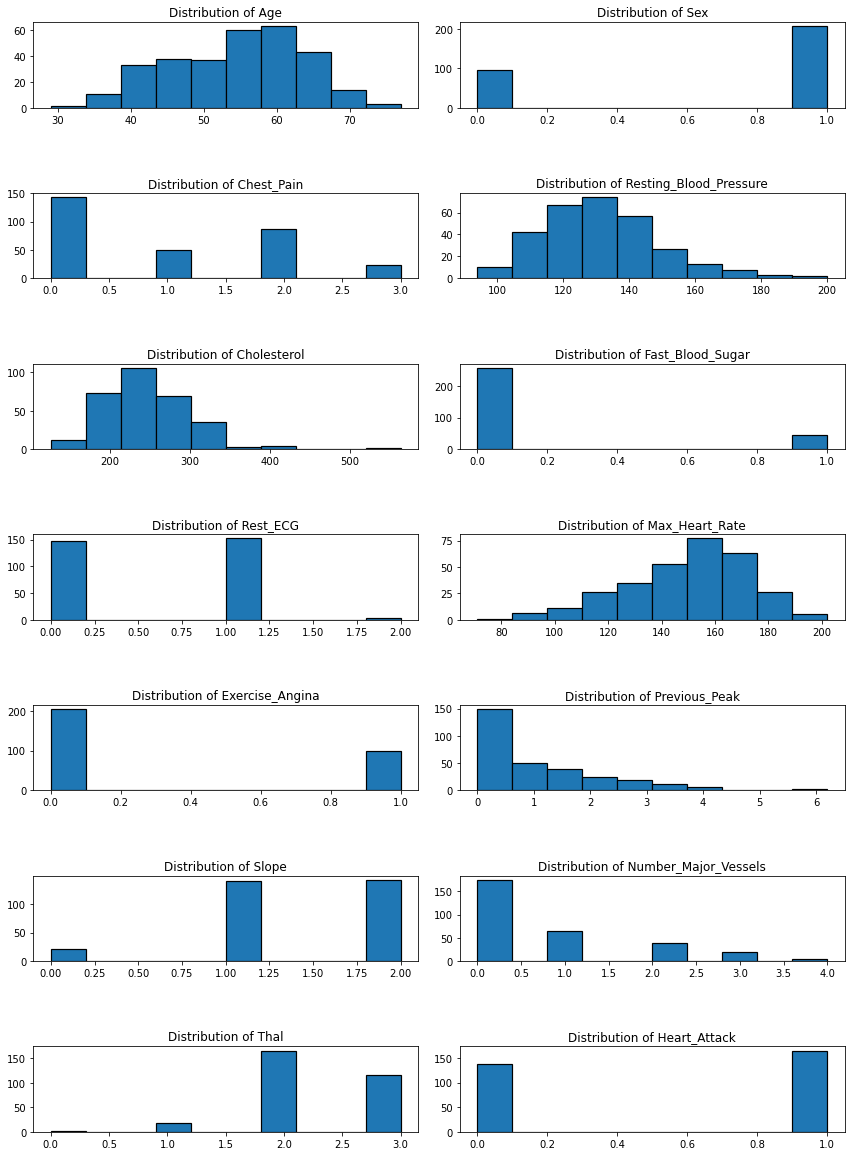

In [11]:
# Histogram of Every Attribute
fig, axes = plt.subplots(7, 2, figsize=(12,16))
fig.tight_layout()
fig.subplots_adjust(hspace = 1)

row = 7
column = 2
plotnum = 1

for col in h_data.columns:
    plt.subplot(row, column, plotnum)
    plt.hist(h_data[col], edgecolor='black', linewidth=1.2)
    plt.title("Distribution of %s" % col)
    plotnum += 1
    
plt.show()

Resting blood pressure and Cholesterol may have outliers.

### Closer Look at Attributes of Interest (Resting Blood Pressure and Cholesterol)

#### Resting Blood Pressure 

Text(0.5, 0, 'Resting Blood Pressure (mm Hg)')

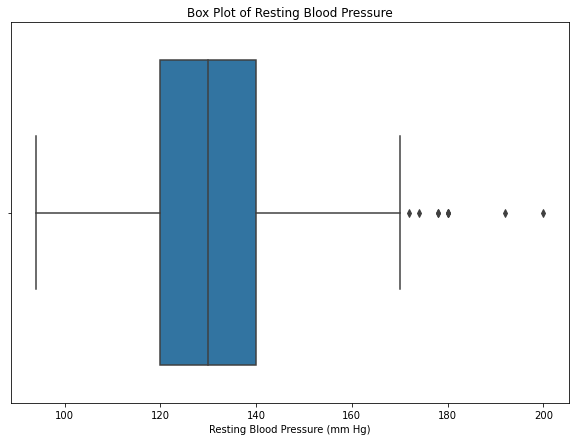

In [12]:
plt.figure(figsize = (10,7))
sns.boxplot(x=h_data["Resting_Blood_Pressure"])
plt.title("Box Plot of Resting Blood Pressure")
plt.xlabel("Resting Blood Pressure (mm Hg)")

In [13]:
# From earlier, the 25% and 75% quartile marks for resting blood pressure are at 120 and 140 respectively.
# IQR = 140 - 120 = 20
# Outliers = Third_Quartile + 1.5 * IQR = 140 + 1.5(20) = 170

## Identify Records whose Resting_Blood_Pressure is Above 170
rbp_outlier = h_data.loc[h_data['Resting_Blood_Pressure'] >= 170].index.to_list()

outlier_dict = {}
for i in rbp_outlier:
    rbp_zscore = round((h_data.loc[i,'Resting_Blood_Pressure'] - np.mean(h_data['Resting_Blood_Pressure'])) / np.std(
        h_data['Resting_Blood_Pressure']),2)
    outlier_dict[i] = rbp_zscore

for key, value in outlier_dict.items():
    if value >= 3 or value <= -3:
        print("Outlier Instance " + str(key) + ": ", 
              h_data.loc[key, "Resting_Blood_Pressure"])

Outlier Instance 223:  200
Outlier Instance 248:  192


Because Records 223 and 248 have resting blood pressure values that exceed 3 standard deviations, records 223 and 248 should be removed from the data set.

#### Cholesterol

Text(0.5, 0, 'Cholesterol (mg/dl)')

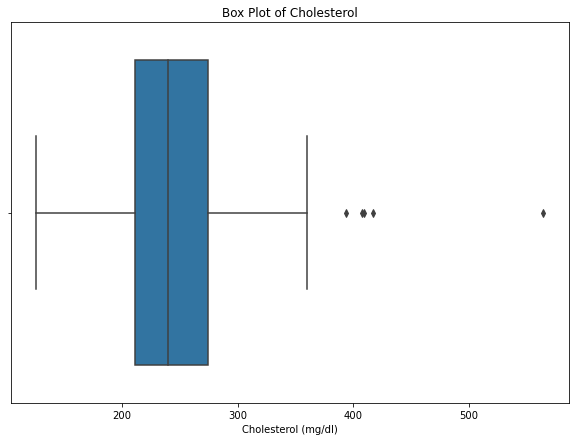

In [14]:
plt.figure(figsize = (10,7))
sns.boxplot(x=h_data["Cholesterol"])
plt.title("Box Plot of Cholesterol")
plt.xlabel("Cholesterol (mg/dl)")

In [15]:
# From earlier, the 25% and 75% quartile marks for cholesterol are at 211 and 274.5 respectively.
# IQR = 274.5 - 211 = 63.5
# Outliers = Third_Quartile + 1.5 * IQR = 274.5 + 1.5(63.5) = 369.75

## Identify Records whose Resting_Blood_Pressure is Above 170
chol_outlier = h_data.loc[h_data['Cholesterol'] >= 369.75].index.to_list()

choloutlier_dict = {}
for i in chol_outlier:
    chol_zscore = round((h_data.loc[i,'Cholesterol'] - np.mean(h_data['Cholesterol'])) / np.std(
        h_data['Cholesterol']),2)
    choloutlier_dict[i] = chol_zscore

for key, value in choloutlier_dict.items():
    if value >= 3 or value <= -3:
        print("Outlier Instance " + str(key) + ": ", 
              h_data.loc[key, "Cholesterol"])

Outlier Instance 28:  417
Outlier Instance 85:  564
Outlier Instance 220:  407
Outlier Instance 246:  409


Instances 28, 85, 220, and 246 have cholesterol values that exceed three standard deviations. These records should be considered for removal from the data set.

#### Resting ECG

In [16]:
# Make those instances have a Rest_ECG value = 1
h_data.loc[h_data['Rest_ECG'] == 2, 'Rest_ECG'] = 1

Rest_ECG has 4 instaces where the value was equal to 2. To balance the data, all records of 2 were revalued as 1. The values for the category are still representative of the original classes, where 0 still represents no abnormalities and 1 represents abnormalities.

### Oxygen Saturation Data Set Distribution

In [17]:
#s_data.value_counts().head()

In [18]:
'''
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,9))
plt.suptitle("Distribution of Blood Oxygen Saturation Level")
ax1.boxplot(s_data['98.6'])
ax1.set_title("Boxplot Distribution")
ax1.set_ylabel("Blood Oxygen Percent (%)")
ax1.get_xaxis().set_visible(False)

ax2.hist(s_data, bins = 10)
ax2.set_title("Histogram Distribution")
ax2.set_ylabel("Frequency")
ax2.set_xlabel("Blood Oxygen Percent (%)")
'''

'\nf, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,9))\nplt.suptitle("Distribution of Blood Oxygen Saturation Level")\nax1.boxplot(s_data[\'98.6\'])\nax1.set_title("Boxplot Distribution")\nax1.set_ylabel("Blood Oxygen Percent (%)")\nax1.get_xaxis().set_visible(False)\n\nax2.hist(s_data, bins = 10)\nax2.set_title("Histogram Distribution")\nax2.set_ylabel("Frequency")\nax2.set_xlabel("Blood Oxygen Percent (%)")\n'

## Z- Score Based Outlier Detection

### 5. DETECTION OF OUTLIERS

   (5i).DISTRIBUTION PLOT OF resting blood pressure and cholestrol

<AxesSubplot:xlabel='Cholesterol', ylabel='Density'>

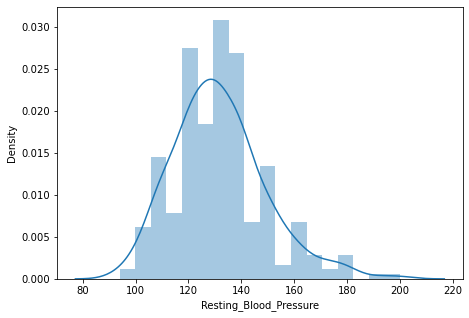

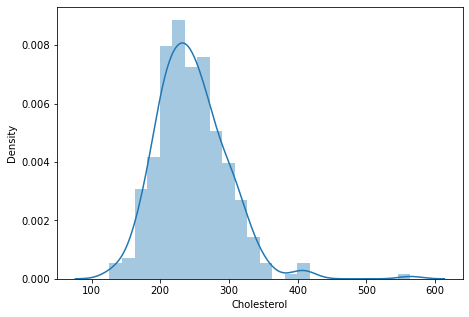

In [19]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(h_data["Resting_Blood_Pressure"])

warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(h_data["Cholesterol"])

(5ii) Finding the Boundary Values

In [20]:
upper=print("Highest:",h_data["Resting_Blood_Pressure"].mean() + 3*h_data["Resting_Blood_Pressure"].std())
lower=print("Lowest: ",h_data["Resting_Blood_Pressure"].mean() - 3*h_data["Resting_Blood_Pressure"].std())

Highest: 184.23819081678892
Lowest:  79.00933393568636


Ths lower and upper outlier thresholds based on three standard deviations are 79.009 and 184.238 bpm for resting blood pressure.

In [21]:
upper1=print("Highest:",h_data["Cholesterol"].mean() + 3*h_data["Cholesterol"].std())
lower1=print("Lowest: ",h_data["Cholesterol"].mean() - 3*h_data["Cholesterol"].std())

Highest: 401.75627936643036
Lowest:  90.77177343885015


The lower and upper threshold for cholesterol are 90.772 and 401.756.

(5iii) TRIM THE OUTLIERS

In [22]:
bp_out = h_data[(h_data["Resting_Blood_Pressure"] > 79) & (h_data["Resting_Blood_Pressure"] < 184)] 

In [23]:
ch_out=h_data[(h_data["Cholesterol"] > 91) & (h_data["Cholesterol"] < 402)]

(5iv). Descriptive Statistics After Outlier Removal

In [24]:
bp_out["Resting_Blood_Pressure"].describe()

count    301.000000
mean     131.196013
std       16.784461
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      180.000000
Name: Resting_Blood_Pressure, dtype: float64

In [25]:
ch_out["Cholesterol"].describe()

count    299.000000
mean     243.548495
std       45.857602
min      126.000000
25%      211.000000
50%      240.000000
75%      273.500000
max      394.000000
Name: Cholesterol, dtype: float64

(5v). Plots of Resting_Blood_Pressure and Cholsterol, before and after outlier removal

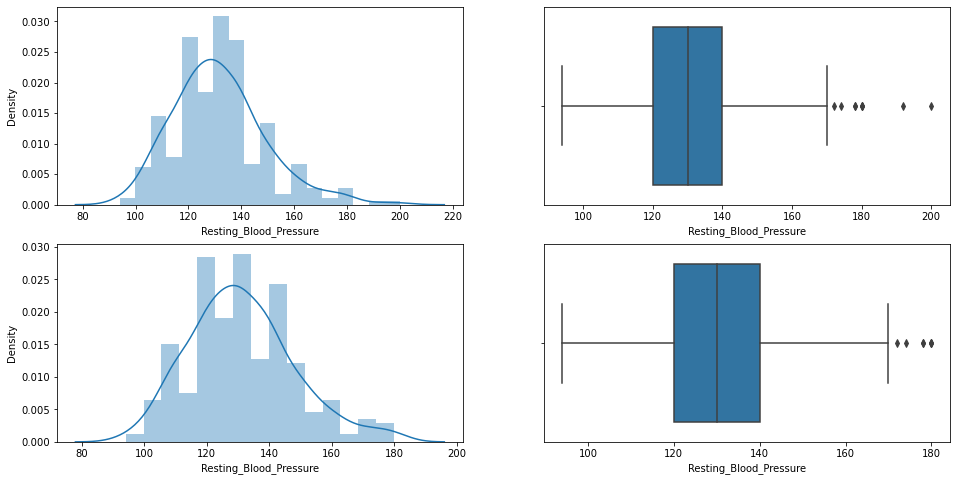

In [26]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(h_data["Resting_Blood_Pressure"])
plt.subplot(2,2,2)
sns.boxplot(h_data["Resting_Blood_Pressure"])
plt.subplot(2,2,3)
sns.distplot(bp_out['Resting_Blood_Pressure'])
plt.subplot(2,2,4)
sns.boxplot(bp_out['Resting_Blood_Pressure'])
plt.show()

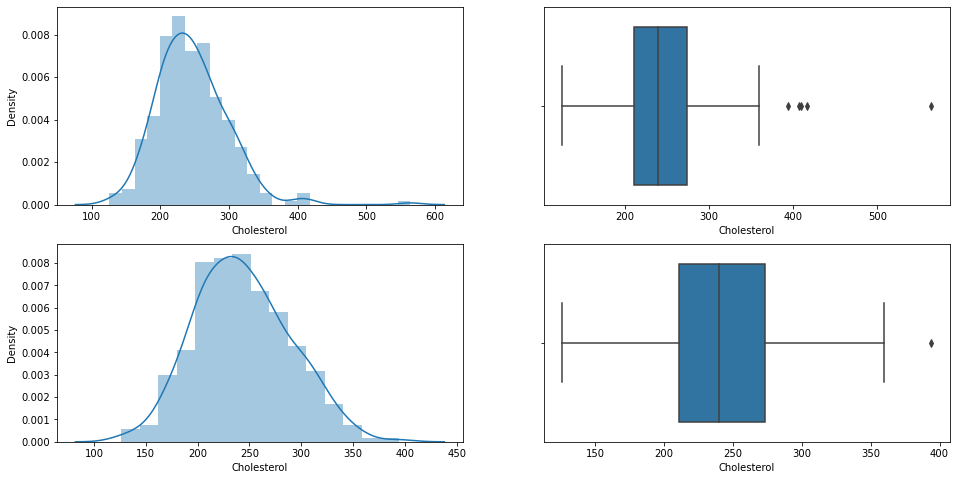

In [27]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(h_data["Cholesterol"])
plt.subplot(2,2,2)
sns.boxplot(h_data["Cholesterol"])
plt.subplot(2,2,3)
sns.distplot(ch_out['Cholesterol'])
plt.subplot(2,2,4)
sns.boxplot(ch_out['Cholesterol'])
plt.show()

### 6. Correlation Between Attributes

In [28]:
CorrMAt = h_data.corr()

Text(0.5, 1.0, 'Correlation Heatmap of Attributes')

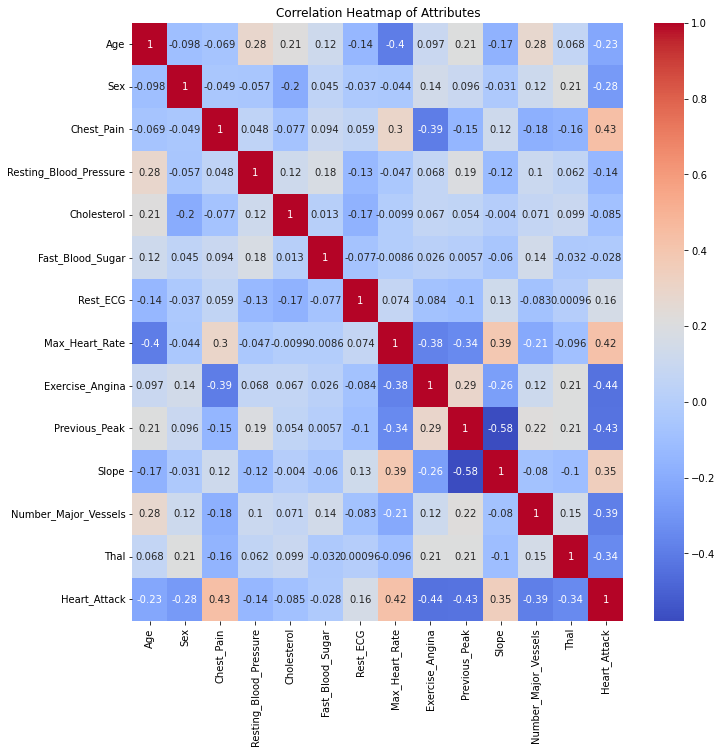

In [29]:
plt.figure(figsize = (11,11))
sns.heatmap(CorrMAt, annot = True, cmap= 'coolwarm')
plt.title("Correlation Heatmap of Attributes")

The strongest degrees of correlation are -0.578, between slope and previous_peak, and 0.434, between chest pain type and probability of a heart attack. These correlation values represent a moderate linear relationship. Because the correlation coefficient values between the attributes are low, issues of multicollinearity are not a concern.

## Modeling

### 1. Feature Score

In [30]:
X = h_data.drop(['Heart_Attack'],1)
y = h_data['Heart_Attack']  
bestfeatures = SelectKBest(score_func= f_classif, k=5) 
fit = bestfeatures.fit(X,y)  
dfscores = pd.DataFrame(fit.scores_) 
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1) 
featureScores.columns = ['Features','Score']
#naming the dataframe columns  
featureScores=featureScores.sort_values(by=['Score'],ascending=False)
feature=featureScores['Features'][:].to_list()

In [31]:
featureScores

,Features,Score
8,Exercise_Angina,70.952438
2,Chest_Pain,69.772271
9,Previous_Peak,68.551439
7,Max_Heart_Rate,65.120104
11,Number_Major_Vessels,54.559834
10,Slope,40.902071
12,Thal,40.407696
1,Sex,25.792191
0,Age,16.116700
6,Rest_ECG,7.885258


From the feature score it is evident that "exercise induced angina" attribute has high score of impact on the dataset. However,  because the feature "exercise induced angina" is inherently, somewhat biased towards chest pain and heart attack probability, it would not be an interesting feature to use as a predictor.


### 2. SPLIT INTO TRAIN AND TEST

In [32]:
## Rebalance Data Set ##
h_data['Chest_Pain'].value_counts()
to_resample = h_data.loc[h_data['Chest_Pain'] == 3]

#Resample with 32 to reach 20%
our_resample = to_resample.sample(n = 32, replace = True)

h_data_rebal = pd.concat([h_data, our_resample])
h_data_rebal['Chest_Pain'].value_counts()
h_data_rebal = h_data_rebal.reset_index()

In [33]:
# Split into training and testing sets
X_train, X_test,y_train,y_test = train_test_split(h_data_rebal,
                                                  h_data_rebal['Chest_Pain'],
                                                  test_size = 0.30, 
                                                  random_state = 50)
# Label y-sets column names
y_train = pd.DataFrame(y_train, columns = ['Chest_Pain'])
y_test = pd.DataFrame(y_test, columns = ['Chest_Pain'])

# Binarize Chest Pain
X_train.loc[X_train['Chest_Pain'] == 3] = 0
X_train.loc[X_train['Chest_Pain'] == 2] = 1
y_train.loc[y_train['Chest_Pain'] == 3] = 0
y_train.loc[y_train['Chest_Pain'] == 2] = 1

X_test.loc[X_test['Chest_Pain'] == 3] = 0
X_test.loc[X_test['Chest_Pain'] == 2] = 1
y_test.loc[y_test['Chest_Pain'] == 3] = 0
y_test.loc[y_test['Chest_Pain'] == 2] = 1

### 3. Modeling and Validation

#### Decision Tree Modeling

[Text(996.4285714285713, 1009.5428571428572, 'Rest_ECG <= 0.5\ngini = 0.469\nsamples = 234\nvalue = [146, 88]\nclass = 0'),
 Text(797.1428571428571, 854.2285714285715, 'Sex <= 160.5\ngini = 0.313\nsamples = 165\nvalue = [133, 32]\nclass = 0'),
 Text(597.8571428571429, 698.9142857142858, 'Resting_Blood_Pressure <= 3.5\ngini = 0.147\nsamples = 125\nvalue = [115, 10]\nclass = 0'),
 Text(398.57142857142856, 543.6, 'Sex <= 101.0\ngini = 0.135\nsamples = 124\nvalue = [115, 9]\nclass = 0'),
 Text(199.28571428571428, 388.28571428571433, 'gini = 0.0\nsamples = 46\nvalue = [46, 0]\nclass = 0'),
 Text(597.8571428571429, 388.28571428571433, 'Sex <= 104.0\ngini = 0.204\nsamples = 78\nvalue = [69, 9]\nclass = 0'),
 Text(398.57142857142856, 232.97142857142865, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1'),
 Text(797.1428571428571, 232.97142857142865, 'Fast_Blood_Sugar <= 0.35\ngini = 0.186\nsamples = 77\nvalue = [69, 8]\nclass = 0'),
 Text(597.8571428571429, 77.65714285714284, 'gini = 0.397\n

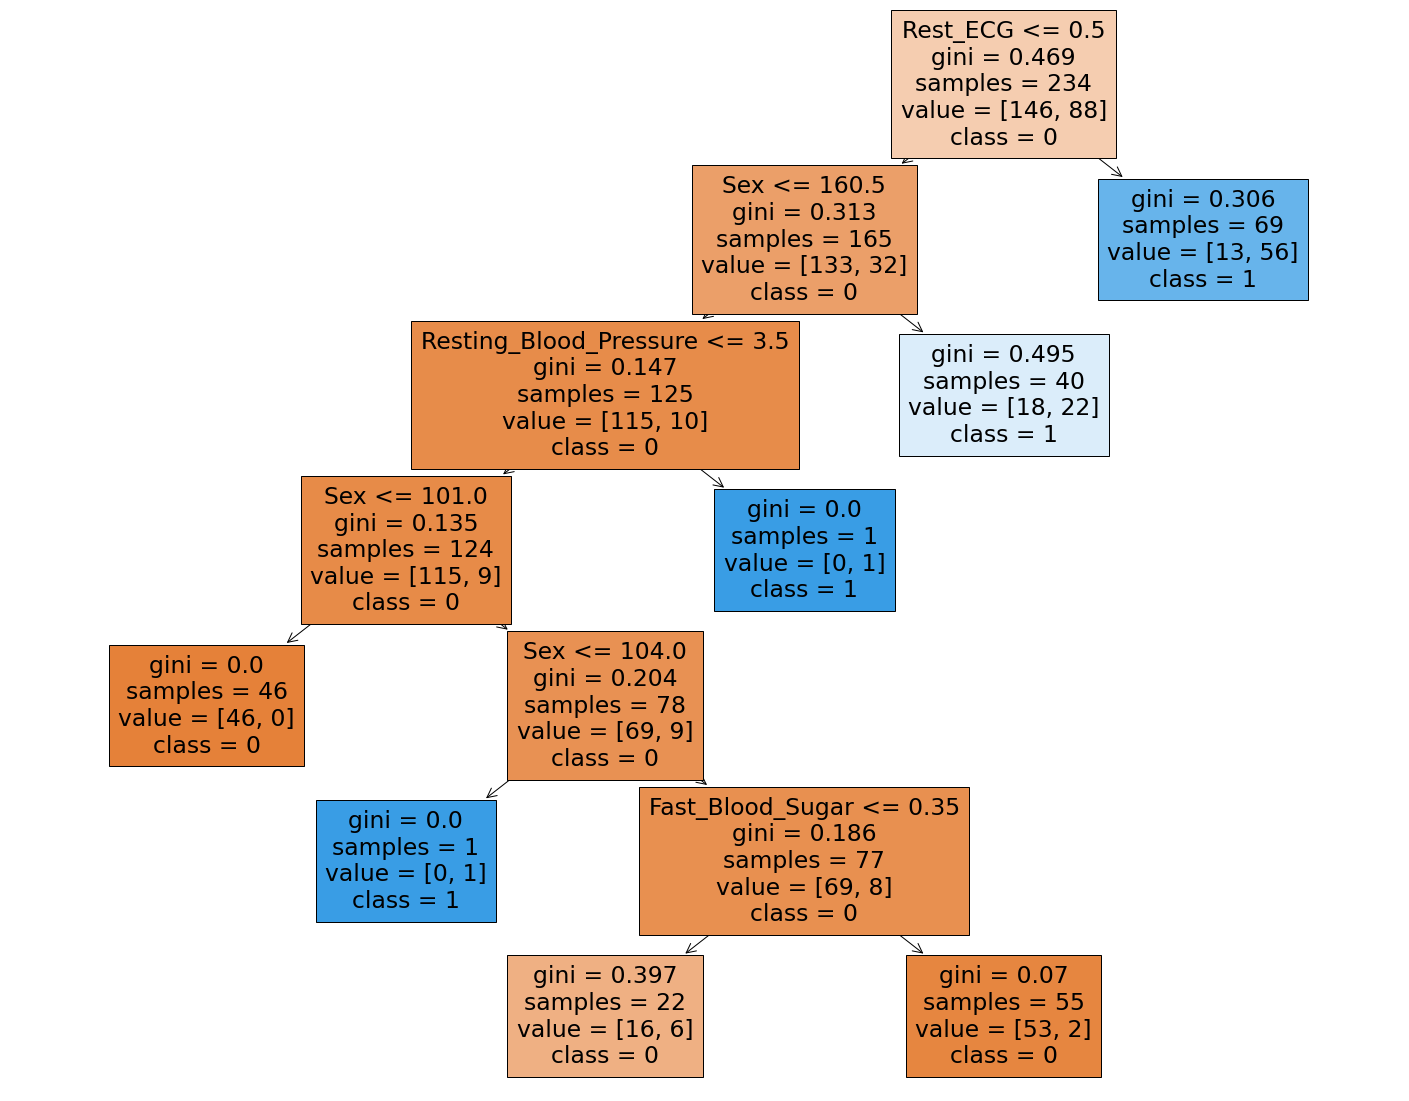

In [34]:
# As a binomial variable, convert sex to a dummy variable #
tree_xtrainsex = pd.DataFrame.copy(X_train['Sex'])
tree_xtrainsex = pd.get_dummies(tree_xtrainsex)

# Decision Tree X - training DataFrame
tree_xtrain = pd.DataFrame.copy(X_train[["Sex", "Cholesterol", "Max_Heart_Rate", "Rest_ECG", "Resting_Blood_Pressure",
                       "Fast_Blood_Sugar", "Number_Major_Vessels", "Previous_Peak"]])
# Make Indices Match
tree_xtrain_index = tree_xtrain.index.tolist()
tree_xtrainsex = tree_xtrainsex.reindex(tree_xtrain_index)

# Merge DataFrames
tree_xtrain = pd.concat((X_train[["Sex", "Cholesterol", "Max_Heart_Rate", "Rest_ECG", "Resting_Blood_Pressure",
                       "Fast_Blood_Sugar", "Number_Major_Vessels", "Previous_Peak"]], 
                         tree_xtrainsex), axis = 1)
# Feature Names
x_trainnames = ["Female", "Male", "Sex", "Cholesterol", "Max_Heart_Rate", "Rest_ECG", "Resting_Blood_Pressure",
                       "Fast_Blood_Sugar", "Number_Major_Vessels", "Previous_Peak"]

# Decision Tree y - training DataFrame
tree_ytrain = pd.DataFrame.copy(y_train)
tree_ytrain = tree_ytrain[['Chest_Pain']]

y_names = ["0", "1"]

carttrain = DecisionTreeClassifier(criterion = "gini", min_samples_split = 75).fit(tree_xtrain, tree_ytrain)

plt.figure(figsize = (25,20))
sklearn.tree.plot_tree(carttrain, feature_names = x_trainnames, class_names = y_names,
                      filled = True)

#### Decision Tree Validation

[Text(697.5, 951.3000000000001, 'Cholesterol <= 0.5\ngini = 0.5\nsamples = 101\nvalue = [52, 49]\nclass = 0'),
 Text(348.75, 679.5, 'Sex <= 169.5\ngini = 0.172\nsamples = 42\nvalue = [38, 4]\nclass = 0'),
 Text(174.375, 407.70000000000005, 'gini = 0.097\nsamples = 39\nvalue = [37, 2]\nclass = 0'),
 Text(523.125, 407.70000000000005, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = 1'),
 Text(1046.25, 679.5, 'Fast_Blood_Sugar <= 1.15\ngini = 0.362\nsamples = 59\nvalue = [14, 45]\nclass = 1'),
 Text(871.875, 407.70000000000005, 'Max_Heart_Rate <= 122.0\ngini = 0.18\nsamples = 50\nvalue = [5, 45]\nclass = 1'),
 Text(697.5, 135.89999999999998, 'gini = 0.046\nsamples = 42\nvalue = [1, 41]\nclass = 1'),
 Text(1046.25, 135.89999999999998, 'gini = 0.5\nsamples = 8\nvalue = [4, 4]\nclass = 0'),
 Text(1220.625, 407.70000000000005, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]\nclass = 0')]

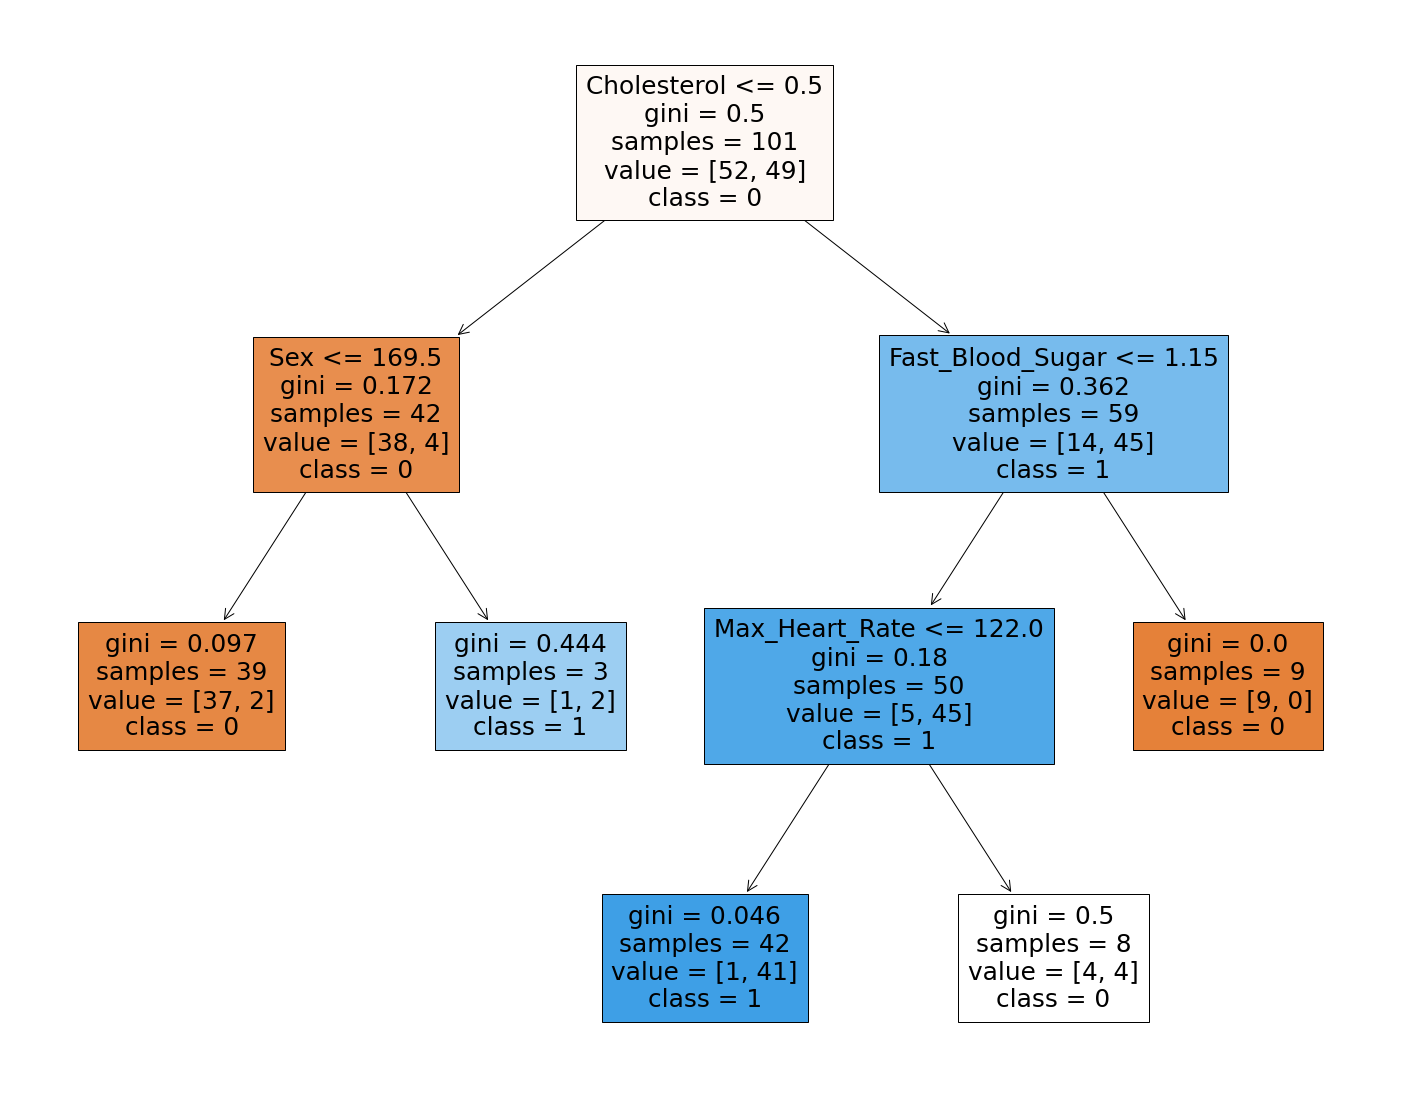

In [35]:
# As a binomial variable, convert sex to a dummy variable #
tree_xtestsex = pd.DataFrame.copy(X_test['Sex'])
tree_xtestsex = pd.get_dummies(tree_xtestsex)

# Decision Tree X - training DataFrame
tree_xtest = pd.DataFrame.copy(X_test[["Sex", "Cholesterol", "Max_Heart_Rate", "Rest_ECG", "Resting_Blood_Pressure",
                       "Fast_Blood_Sugar", "Number_Major_Vessels", "Previous_Peak"]])
# Make Indices Match
tree_xtest_index = tree_xtest.index.tolist()
tree_xtestsex = tree_xtestsex.reindex(tree_xtest_index)

# Merge DataFrames
tree_xtest = pd.concat((X_test[["Sex", "Cholesterol", "Max_Heart_Rate", "Rest_ECG", "Resting_Blood_Pressure",
                       "Fast_Blood_Sugar", "Number_Major_Vessels", "Previous_Peak"]], 
                         tree_xtestsex), axis = 1)
# Feature Names
x_testnames = ["Female", "Male", "Sex", "Cholesterol", "Max_Heart_Rate", "Rest_ECG", "Resting_Blood_Pressure",
                       "Fast_Blood_Sugar", "Number_Major_Vessels", "Previous_Peak"]

# Decision Tree y - training DataFrame
tree_ytest = pd.DataFrame.copy(y_test)
tree_ytest = tree_ytest[['Chest_Pain']]

y_names = ["0", "1"]

carttest = DecisionTreeClassifier(criterion = "gini", max_leaf_nodes = 5).fit(tree_xtest, tree_ytest)

plt.figure(figsize = (25,20))
sklearn.tree.plot_tree(carttest, feature_names = x_testnames, class_names = y_names,
                      filled = True)

#### Cart Decision Tree Prediction

In [36]:
tree_pred = carttrain.predict(tree_xtest)

#### Cart Confusion Matrix

In [37]:
treecnf_matrix = metrics.confusion_matrix(tree_ytest, tree_pred)
treecnf_matrix

array([[38, 14],
       [ 4, 45]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

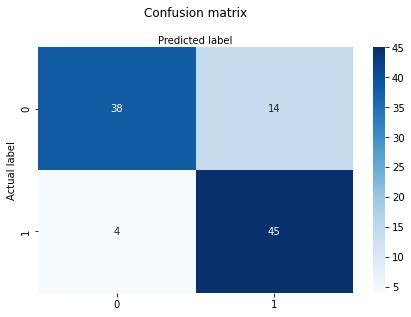

In [38]:
c=[0,1]
fig, ax = plt.subplots()
t = np.arange(len(c))
plt.xticks(t, c)
plt.yticks(t, c)

# create heatmap
sns.heatmap(pd.DataFrame(treecnf_matrix), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [39]:
tn = 40
tp = 25
fp = 24
fn = 12
total = 40 + 25 + 24 + 12

accuracy = (tn + tp)/total
error_rate = 1 - accuracy
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)
recall = specificity
precision = tp/(fp+tp)
F1_score = 2 * (precision * recall)/(precision + recall)

eval_metric_df = pd.DataFrame({"Cart" : [accuracy, error_rate, sensitivity,
                                           recall, precision, F1_score]},
                             index = ["Accuracy", "Error_Rate", "Sensitivity",
                                     "Recall/Specificity", "Precision", "F1_Score"])
eval_metric_df

,Cart
Accuracy,0.643564
Error_Rate,0.356436
Sensitivity,0.675676
Recall/Specificity,0.625000
Precision,0.510204
F1_Score,0.561798


#### Logistic Regression Modeling

In [40]:
logittrain_X = pd.DataFrame(X_train[["Sex", "Cholesterol", "Max_Heart_Rate", "Rest_ECG", "Resting_Blood_Pressure",
                       "Fast_Blood_Sugar", "Number_Major_Vessels", "Previous_Peak"]])
logittrain_X = sm.add_constant(logittrain_X)

In [41]:
logittrain_y = pd.DataFrame.copy(y_train)

## For logistic regression the outcome variable must be between [0,1]
## Binarizing the y-variable earlier satistfies this requirement
logittrain_y = logittrain_y['Chest_Pain']

# Chest_Pain = 0 represents non-anginal pain
# Chest_Pain = 1 represents anginal pain

In [42]:
logitmodel = sm.Logit(logittrain_y, logittrain_X).fit()

Optimization terminated successfully.
         Current function value: 0.370956
         Iterations 7


In [43]:
logitmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Chest_Pain   No. Observations:                  234
Model:                          Logit   Df Residuals:                      225
Method:                           MLE   Df Model:                            8
Date:                Tue, 12 Apr 2022   Pseudo R-squ.:                  0.4397
Time:                        17:33:51   Log-Likelihood:                -86.804
converged:                       True   LL-Null:                       -154.93
Covariance Type:            nonrobust   LLR p-value:                 1.422e-25
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -2.1189      0.468     -4.525      0.000      -3.037      -1.201
Sex                        0.6255      0.465      1.347      0.178      -0.285       1.536
Cholesterol                0.0010      0.005      0.192      0.848      -0.009       0.011
Max_Heart_Rate             0.0229      0.009      2.427      0.015       0.004       0.041
Rest_ECG                   1.5895      0.428      3.710      0.000       0.750       2.429
Resting_Blood_Pressure    -0.0280      0.012     -2.336      0.020      -0.052      -0.005
Fast_Blood_Sugar           3.1706      0.628      5.046      0.000       1.939       4.402
Number_Major_Vessels      -0.2120      0.275     -0.770      0.442      -0.752       0.328
Previous_Peak             -0.8657      0.336     -2.574      0.010      -1.525      -0.206
==========================================================================================
"""

#### Logistic Model Validation

In [44]:
# Prepare X-test dataframe
logittest_X = pd.DataFrame(X_test[["Sex", "Cholesterol", "Max_Heart_Rate", "Rest_ECG", "Resting_Blood_Pressure",
                       "Fast_Blood_Sugar", "Number_Major_Vessels", "Previous_Peak"]])
logittest_X = sm.add_constant(logittest_X)

# Convert y_test into a DataFrame Object
logittest_y = pd.DataFrame.copy(y_test)

# Run Prediction
logitpred = logitmodel.predict(logittest_X)

In [45]:
# Convert probability predictions to classes
# Threshold = 0.5
logitpred = (logitpred > 0.5).astype(int)

In [46]:
logitcnf_matrix = metrics.confusion_matrix(logittest_y, logitpred)
logitcnf_matrix

array([[49,  3],
       [ 7, 42]], dtype=int64)

#### Heatmap of confusion matrix

Text(0.5, 257.44, 'Predicted label')

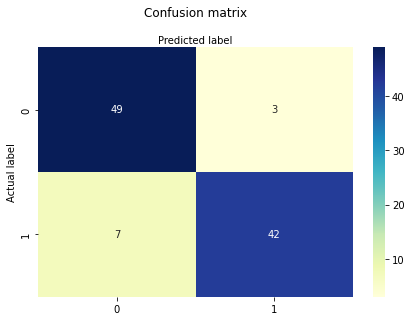

In [47]:
c=[0,1]
fig, ax = plt.subplots()
t = np.arange(len(c))
plt.xticks(t, c)
plt.yticks(t, c)

# create heatmap
sns.heatmap(pd.DataFrame(logitcnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [48]:
print("Accuracy:",metrics.accuracy_score(logittest_y, logitpred))
print("Precision:",metrics.precision_score(logittest_y, logitpred))
print("Recall:",metrics.recall_score(logittest_y, logitpred))

Accuracy: 0.900990099009901
Precision: 0.9333333333333333
Recall: 0.8571428571428571


In [49]:
tn = 42
tp = 19
fp = 30
fn = 10
total = 42 + 19 + 30 + 10

logit_accuracy = (tn + tp)/total
logit_error_rate = 1 - accuracy
logit_sensitivity = tp/(tp+fn)
logit_specificity = tn/(tn+fp)
logit_recall = specificity
logit_precision = tp/(fp+tp)
logit_F1_score = 2 * (precision * recall)/(precision + recall)

eval_metric_df["Logistic_Regression"] = [logit_accuracy, logit_error_rate, logit_sensitivity,
                                           logit_recall, logit_precision, logit_F1_score]
eval_metric_df

,Cart,Logistic_Regression
Accuracy,0.643564,0.603960
Error_Rate,0.356436,0.356436
Sensitivity,0.675676,0.655172
Recall/Specificity,0.625000,0.625000
Precision,0.510204,0.387755
F1_Score,0.561798,0.561798


#### Naive Bayes Model

In [50]:
nb_xtrain = X_train[["Sex", "Cholesterol", "Max_Heart_Rate", "Rest_ECG", "Resting_Blood_Pressure",
                       "Fast_Blood_Sugar", "Number_Major_Vessels", "Previous_Peak"]]
nb_xtest = X_test[["Sex", "Cholesterol", "Max_Heart_Rate", "Rest_ECG", "Resting_Blood_Pressure",
                       "Fast_Blood_Sugar", "Number_Major_Vessels", "Previous_Peak"]]

ct = make_column_transformer(
     (MinMaxScaler(), ["Sex", "Cholesterol", "Max_Heart_Rate", "Rest_ECG", "Resting_Blood_Pressure",
                       "Fast_Blood_Sugar", "Number_Major_Vessels", "Previous_Peak"]))

ct.fit(nb_xtrain)
X_train_normal = ct.transform(nb_xtrain)
X_test_normal = ct.transform(nb_xtest)

In [51]:
from sklearn.naive_bayes import BernoulliNB

# initializaing the NB
classifer = BernoulliNB()

# training the model
nb_ytrain = y_train[['Chest_Pain']]
classifer.fit(nb_xtrain, nb_ytrain)

# testing the model
y_pred = classifer.predict(nb_xtest)

In [52]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
def calculate_results(y_true, y_pred):
    """
    Calculates model accuracy, precision, recall and f1 score of a binary classification model.

    Args:
        y_true: true labels in the form of a 1D array
        y_pred: predicted labels in the form of a 1D array

    Returns a dictionary of accuracy, precision, recall, f1-score.
    """
    # Calculate model accuracy
    model_accuracy = accuracy_score(y_true, y_pred) * 100
    # Calculate model precision, recall and f1 score using "weighted average
    model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
    model_results = {"accuracy": model_accuracy,
                     "precision": model_precision,
                     "recall": model_recall,
                     "f1": model_f1}
    return model_results

In [53]:
calculate_results(y_pred, y_test)

{'accuracy': 75.24752475247524,
 'precision': 0.7538041873261109,
 'recall': 0.7524752475247525,
 'f1': 0.7524752475247524}

In [54]:
from sklearn.metrics import confusion_matrix
y_pred = classifer.predict(X_test_normal)
#Generate the confusion matrix
y_pred = np.where(y_pred > .5, 1,0)

#cf_matrix = confusion_matrix(y_test, y_pred)

cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[38 14]
 [11 38]]


[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

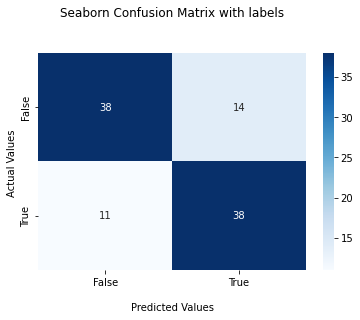

In [55]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

In [56]:
from sklearn import metrics
y_pred_proba = classifer.predict_proba(X_test_normal)
print(y_pred_proba.shape)
y_pred_proba = y_pred_proba[:,1]

(101, 2)


In [57]:
#nb_ytest = y_test[['Chest_Pain']]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

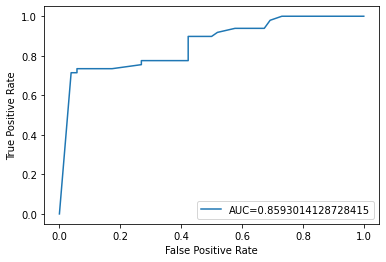

In [58]:
import matplotlib.pyplot as plt

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [59]:
sensitivity1 = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cf_matrix[1,1]/(cf_matrix[1,0]+cf_matrix[1,1])
print('Specificity : ', specificity1)

Sensitivity :  0.7307692307692307
Specificity :  0.7755102040816326


#### Neural Network Model

In [60]:
# Make X-test and training sets
nn_xtrain = X_train[["Sex", "Cholesterol", "Max_Heart_Rate", "Rest_ECG", "Resting_Blood_Pressure",
                       "Fast_Blood_Sugar", "Number_Major_Vessels", "Previous_Peak"]]
nn_xtest = X_test[["Sex", "Cholesterol", "Max_Heart_Rate", "Rest_ECG", "Resting_Blood_Pressure",
                       "Fast_Blood_Sugar", "Number_Major_Vessels", "Previous_Peak"]]

# Scale Columns
ct = make_column_transformer(
     (MinMaxScaler(), ["Sex", "Cholesterol", "Max_Heart_Rate", "Rest_ECG", "Resting_Blood_Pressure",
                       "Fast_Blood_Sugar", "Number_Major_Vessels", "Previous_Peak"])
)

# Fit Data with Transformed/Scaled Attributes
ct.fit(X_train)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

<AxesSubplot:xlabel='Fast_Blood_Sugar', ylabel='Age'>

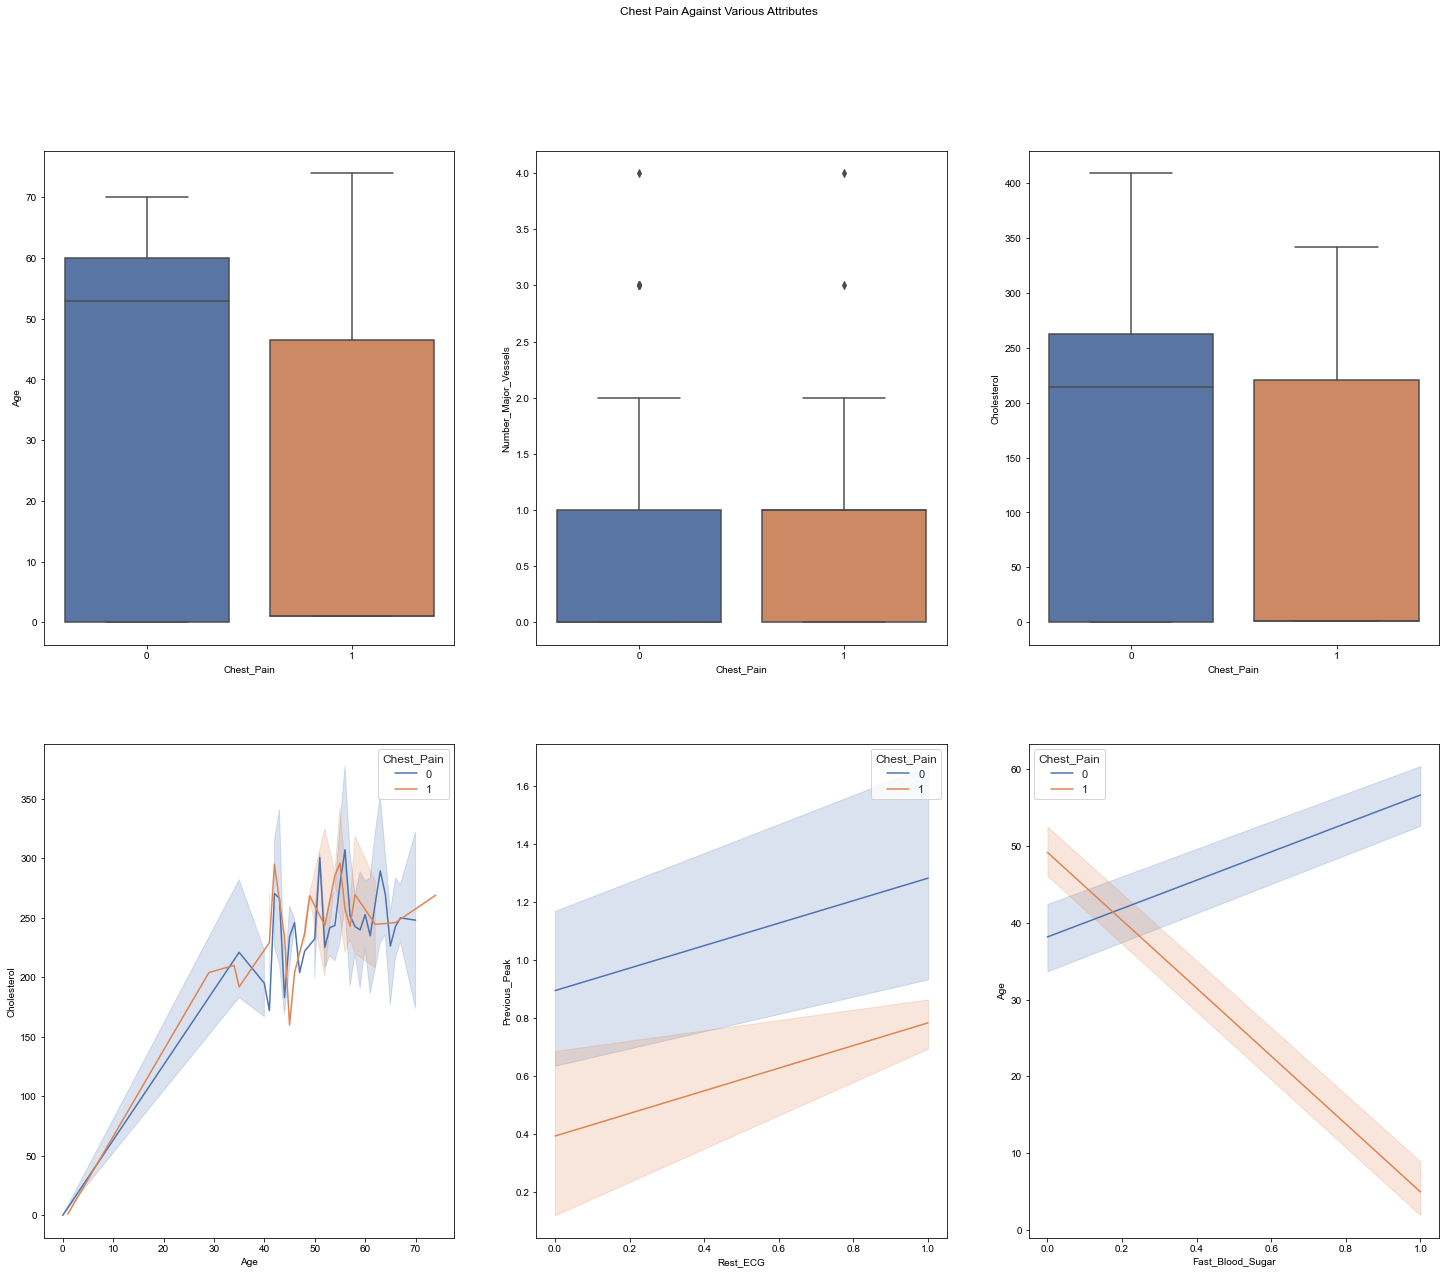

In [61]:
fig, axes = plt.subplots(2,3, figsize = (25,20))
fig.suptitle("Chest Pain Against Various Attributes")
sns.set(style='whitegrid')

sns.boxplot(x="Chest_Pain", y="Age", data=X_train, ax=axes[0,0])
sns.boxplot(x="Chest_Pain", y="Number_Major_Vessels", data=X_train, ax=axes[0,1])
sns.boxplot(x="Chest_Pain", y="Cholesterol", data=X_train, ax=axes[0,2])
sns.lineplot(x="Age", y="Cholesterol", hue = "Chest_Pain", data=X_train, ax=axes[1,0])
sns.lineplot(x="Rest_ECG", y="Previous_Peak", hue = "Chest_Pain", data=X_train, ax=axes[1,1])
sns.lineplot(x="Fast_Blood_Sugar", y="Age", hue = "Chest_Pain", data=X_train, ax=axes[1,2])

<AxesSubplot:xlabel='Age', ylabel='Number_Major_Vessels'>

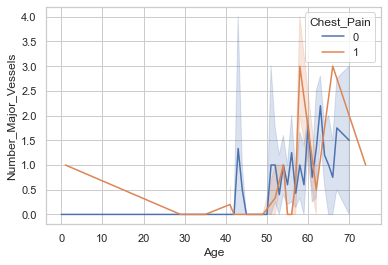

In [62]:
# Plot 7 - Age vs Number of Major Vessels
sns.set(style='whitegrid')
sns.lineplot(x="Age", y="Number_Major_Vessels",
            hue = "Chest_Pain",
                data=X_train)

In [63]:
#Create Neural Network

model = Sequential() 
model.add(Dense(32, activation='relu', input_shape= (8,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 

In [64]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_normal, y_train, validation_data=(X_test_normal, y_test), epochs=20, verbose=2)

scores = model.evaluate(X_test_normal, y_test)
print(f'Accuracy: {scores[1]} \n Error: {1 - scores[1]}')

Epoch 1/20
8/8 - 15s - loss: 0.6970 - accuracy: 0.5427 - val_loss: 0.6594 - val_accuracy: 0.7822
Epoch 2/20
8/8 - 0s - loss: 0.6685 - accuracy: 0.6923 - val_loss: 0.6255 - val_accuracy: 0.8317
Epoch 3/20
8/8 - 0s - loss: 0.6434 - accuracy: 0.7179 - val_loss: 0.5961 - val_accuracy: 0.8416
Epoch 4/20
8/8 - 0s - loss: 0.6206 - accuracy: 0.7735 - val_loss: 0.5661 - val_accuracy: 0.8416
Epoch 5/20
8/8 - 0s - loss: 0.5967 - accuracy: 0.7991 - val_loss: 0.5385 - val_accuracy: 0.8416
Epoch 6/20
8/8 - 0s - loss: 0.5753 - accuracy: 0.8291 - val_loss: 0.5155 - val_accuracy: 0.8614
Epoch 7/20
8/8 - 0s - loss: 0.5545 - accuracy: 0.8291 - val_loss: 0.4921 - val_accuracy: 0.8614
Epoch 8/20
8/8 - 0s - loss: 0.5347 - accuracy: 0.8376 - val_loss: 0.4708 - val_accuracy: 0.8713
Epoch 9/20
8/8 - 0s - loss: 0.5158 - accuracy: 0.8419 - val_loss: 0.4508 - val_accuracy: 0.8713
Epoch 10/20
8/8 - 0s - loss: 0.5007 - accuracy: 0.8419 - val_loss: 0.4324 - val_accuracy: 0.8713
Epoch 11/20
8/8 - 0s - loss: 0.4844 - 

In [65]:
y_pred = model.predict(X_test_normal)
#Generate the confusion matrix
y_pred = np.where(y_pred > .5, 1,0)

#cf_matrix = confusion_matrix(y_test, y_pred)

cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[52  0]
 [13 36]]


In [66]:
#Visualize the Neural Network 

# from ann_visualizer.visualize import ann_viz;

# ann_viz(model, title="Chest Pain Classification")

In [67]:
sensitivity1 = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cf_matrix[1,1]/(cf_matrix[1,0]+cf_matrix[1,1])
print('Specificity : ', specificity1)

Sensitivity :  1.0
Specificity :  0.7346938775510204


[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

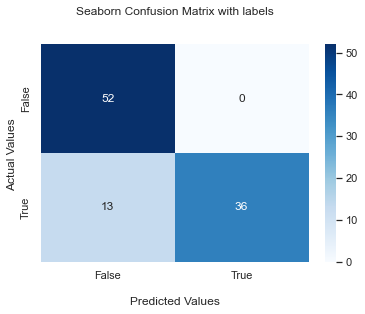

In [68]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

In [69]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
def calculate_results(y_true, y_pred):
    """
    Calculates model accuracy, precision, recall and f1 score of a binary classification model.

    Args:
        y_true: true labels in the form of a 1D array
        y_pred: predicted labels in the form of a 1D array

    Returns a dictionary of accuracy, precision, recall, f1-score.
    """
    # Calculate model accuracy
    model_accuracy = accuracy_score(y_true, y_pred) * 100
    # Calculate model precision, recall and f1 score using "weighted average
    model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
    model_results = {"accuracy": model_accuracy,
                     "precision": model_precision,
                     "recall": model_recall,
                     "f1": model_f1}
    return model_results

In [70]:
calculate_results(y_test,y_pred)

{'accuracy': 87.12871287128714,
 'precision': 0.8970297029702969,
 'recall': 0.8712871287128713,
 'f1': 0.868595094803598}

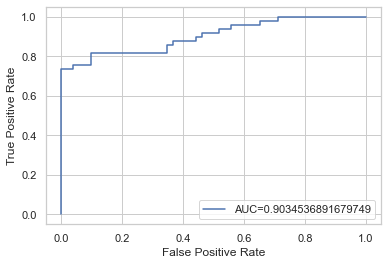

In [71]:
from sklearn import metrics
import matplotlib.pyplot as plt


y_pred_proba = model(X_test_normal)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()